In [7]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

In [8]:
dataset = pd.read_csv("binary classification.csv")
dataset_array = dataset.to_numpy()
x = dataset_array[:, 0:13]  # Extracting features from columns 0 to 12
y = dataset_array[:, 13]    # Extracting labels from column 13

In [9]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, shuffle=True, random_state=42)

In [10]:
# StandardScaler for normalization
scaler = StandardScaler()

# Min-max scaler for normalization
scaler_minmax = MinMaxScaler(feature_range=(0, 1))

In [11]:
# KNN model
model1 = KNeighborsClassifier(n_neighbors=5)
model1.fit(scaler_minmax.fit_transform(X_train), y_train)
predictions1 = model1.predict_proba(scaler_minmax.transform(X_test))
y_pred1 = model1.predict(scaler_minmax.transform(X_test))

In [12]:
# Gradient Boosting model
model2 = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=42)
model2.fit(X_train, y_train)
predictions2 = model2.predict_proba(X_test)
y_pred2 = model2.predict(X_test)

In [13]:
# Weighted Fusion
best_accuracy = 0
best_p = 0

# Selecting the best value for p and q
p = 1
for i in range(19):
    p = p - 0.05
    q = 1 - p

    mixed = predictions1[:, 1] * p + predictions2[:, 1] * q
    rounded_mixed = (mixed > 0.5).astype(int)

    score = accuracy_score(rounded_mixed, y_test)
    print("  mixed  p  q", "%.4f" % score, "%.2f" % p, "%.2f" % q)

    # Update the best parameters if the current accuracy is higher
    if score > best_accuracy:
        best_accuracy = score
        best_p = p

# After selecting the best value of p and q
mixed = predictions1[:, 1] * best_p + predictions2[:, 1] * (1 - best_p)
rounded_mixed = (mixed > 0.5).astype(int)


  mixed  p  q 0.8462 0.95 0.05
  mixed  p  q 0.8462 0.90 0.10
  mixed  p  q 0.8462 0.85 0.15
  mixed  p  q 0.8242 0.80 0.20
  mixed  p  q 0.7912 0.75 0.25
  mixed  p  q 0.7802 0.70 0.30
  mixed  p  q 0.7802 0.65 0.35
  mixed  p  q 0.7692 0.60 0.40
  mixed  p  q 0.7692 0.55 0.45
  mixed  p  q 0.7582 0.50 0.50
  mixed  p  q 0.7582 0.45 0.55
  mixed  p  q 0.7473 0.40 0.60
  mixed  p  q 0.7473 0.35 0.65
  mixed  p  q 0.7473 0.30 0.70
  mixed  p  q 0.7473 0.25 0.75
  mixed  p  q 0.7473 0.20 0.80
  mixed  p  q 0.7473 0.15 0.85
  mixed  p  q 0.7473 0.10 0.90
  mixed  p  q 0.7473 0.05 0.95


In [14]:
# Evaluate accuracy, confusion matrix, and classification report for each model and fusion
accuracy_algo1_test = accuracy_score(y_test, y_pred1)
accuracy_algo2_test = accuracy_score(y_test, y_pred2)
accuracy_fusion_test = accuracy_score(y_test, rounded_mixed)

In [17]:
print("Algorithm 1 Accuracy on Test Set: {:.2%}".format(accuracy_algo1_test))
print("Algorithm 2 Accuracy on Test Set: {:.2%}".format(accuracy_algo2_test))
print("Weighted Fusion Accuracy on Test Set: {:.2%}".format(accuracy_fusion_test))

print("\nConfusion Matrix for Algorithm 1:")
print(confusion_matrix(y_test, y_pred1))

print("\nConfusion Matrix for Algorithm 2:")
print(confusion_matrix(y_test, y_pred2))

print("\nConfusion Matrix for Weighted Fusion:")
print(confusion_matrix(y_test, rounded_mixed))

print("\nClassification Report for Algorithm 1:")
print(classification_report(y_test, y_pred1))

print("\nClassification Report for Algorithm 2:")
print(classification_report(y_test, y_pred2))

print("\nClassification Report for Weighted Fusion:")
print(classification_report(y_test, rounded_mixed))

Algorithm 1 Accuracy on Test Set: 84.62%
Algorithm 2 Accuracy on Test Set: 75.82%
Weighted Fusion Accuracy on Test Set: 84.62%

Confusion Matrix for Algorithm 1:
[[40  8]
 [ 6 37]]

Confusion Matrix for Algorithm 2:
[[37 11]
 [11 32]]

Confusion Matrix for Weighted Fusion:
[[40  8]
 [ 6 37]]

Classification Report for Algorithm 1:
              precision    recall  f1-score   support

         0.0       0.87      0.83      0.85        48
         1.0       0.82      0.86      0.84        43

    accuracy                           0.85        91
   macro avg       0.85      0.85      0.85        91
weighted avg       0.85      0.85      0.85        91


Classification Report for Algorithm 2:
              precision    recall  f1-score   support

         0.0       0.77      0.77      0.77        48
         1.0       0.74      0.74      0.74        43

    accuracy                           0.76        91
   macro avg       0.76      0.76      0.76        91
weighted avg       0.76     

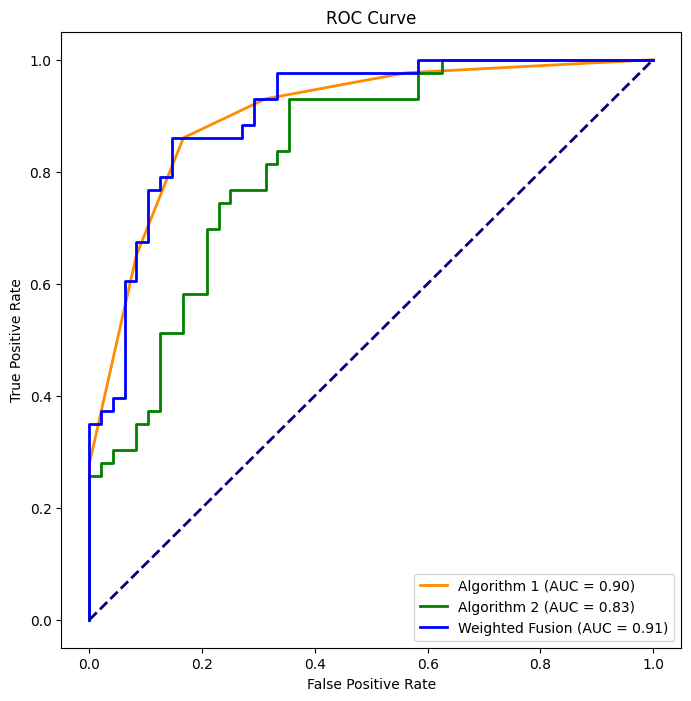

In [16]:
# ROC curve for Algorithm 1
fpr_algo1, tpr_algo1, _ = roc_curve(y_test, predictions1[:, 1])
roc_auc_algo1 = auc(fpr_algo1, tpr_algo1)

# ROC curve for Algorithm 2
fpr_algo2, tpr_algo2, _ = roc_curve(y_test, predictions2[:, 1])
roc_auc_algo2 = auc(fpr_algo2, tpr_algo2)

# ROC curve for Weighted Fusion
fpr_fusion, tpr_fusion, _ = roc_curve(y_test, mixed)
roc_auc_fusion = auc(fpr_fusion, tpr_fusion)

# Plotting ROC curves
plt.figure(figsize=(8, 8))
plt.plot(fpr_algo1, tpr_algo1, color='darkorange', lw=2, label='Algorithm 1 (AUC = {:.2f})'.format(roc_auc_algo1))
plt.plot(fpr_algo2, tpr_algo2, color='green', lw=2, label='Algorithm 2 (AUC = {:.2f})'.format(roc_auc_algo2))
plt.plot(fpr_fusion, tpr_fusion, color='blue', lw=2, label='Weighted Fusion (AUC = {:.2f})'.format(roc_auc_fusion))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()
